In [28]:
import numpy as np
import pandas as pd
from functools import reduce
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
#pd.set_option("precision",4)

# Market Data for US

In [110]:
df_CRSP_market_daily=pd.read_csv('../data/CRSP/CRSP Daily Index Built on Market Capitalization.csv',\
index_col=0,parse_dates=True)

In [111]:
df_CRSP_market_daily =df_CRSP_market_daily[['vwretd']]['2001-01-01':'2020-12-31']

In [26]:
df_AQR_risk_free_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='RF',header=18,index_col=0,parse_dates=True)
df_AQR_risk_free_daily= df_AQR_risk_free_daily['2001-01-01':'2020-12-31']

In [246]:
df_AQR_MKT_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='MKT',header=18,index_col=0,parse_dates=True)
df_AQR_MKT_daily= df_AQR_MKT_daily['2001-01-01':'2020-12-31']

In [96]:
df_FF_5=pd.read_csv('../data/FF_Factors/F-F_Research_Data_5_Factors_2x3_daily.csv',index_col=0,parse_dates=True)
df_FF_5 = df_FF_5['2001-01-01':'2020-12-31']/100

In [97]:
df_FF_5

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2001-01-02,-0.0352,0.0039,0.0165,0.0158,0.0161,0.00026
2001-01-03,0.0539,-0.0065,-0.0439,-0.0266,-0.0594,0.00026
2001-01-04,-0.0130,0.0097,-0.0030,0.0052,-0.0080,0.00026
2001-01-05,-0.0298,0.0071,0.0238,0.0190,0.0231,0.00026
2001-01-08,-0.0036,-0.0043,0.0126,0.0098,0.0067,0.00026
...,...,...,...,...,...,...
2020-12-24,0.0021,-0.0043,-0.0017,0.0024,-0.0005,0.00000
2020-12-28,0.0046,-0.0065,0.0032,0.0146,0.0050,0.00000
2020-12-29,-0.0040,-0.0142,0.0024,0.0075,-0.0028,0.00000


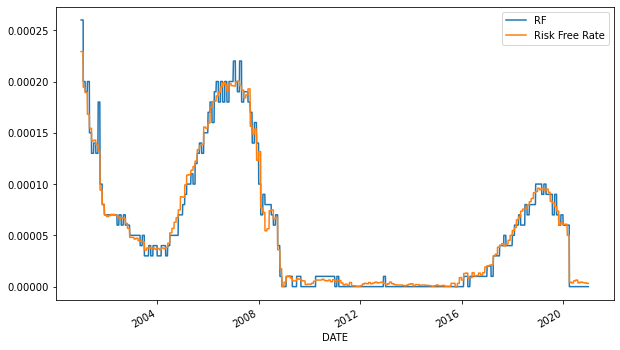

In [98]:
fig, ax =plt.subplots(figsize=(10,6))

df_FF_5.RF.plot(ax=ax)
(df_AQR_risk_free_daily).plot(ax=ax)

plt.legend()

In [257]:
dfs_market_merged=[df_FF_5[['Mkt-RF']],df_CRSP_market_daily[['vwretd']],df_AQR_MKT_daily[['USA']]]
dfs_market_merged=reduce(lambda x,y:pd.merge(x,y,left_index=True, right_index=True),dfs_market_merged)

<AxesSubplot:>

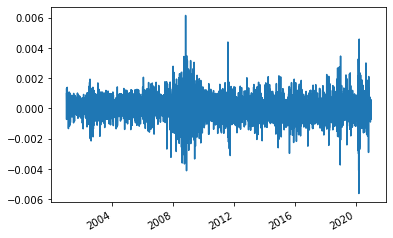

In [262]:
(dfs_market_merged['vwretd']-dfs_market_merged['Mkt-RF']).plot()

In [263]:
dfs_market_merged

,Mkt-RF,vwretd,USA
2001-01-02,-0.0352,-0.034230,-0.034543
2001-01-03,0.0539,0.053170,0.053313
2001-01-04,-0.0130,-0.011674,-0.010935
2001-01-05,-0.0298,-0.028909,-0.028499
2001-01-08,-0.0036,-0.003410,-0.003914
...,...,...,...
2020-12-24,0.0021,0.002332,0.002347
2020-12-28,0.0046,0.003870,0.003893
2020-12-29,-0.0040,-0.003649,-0.003812
2020-12-30,0.0027,0.003281,0.003364


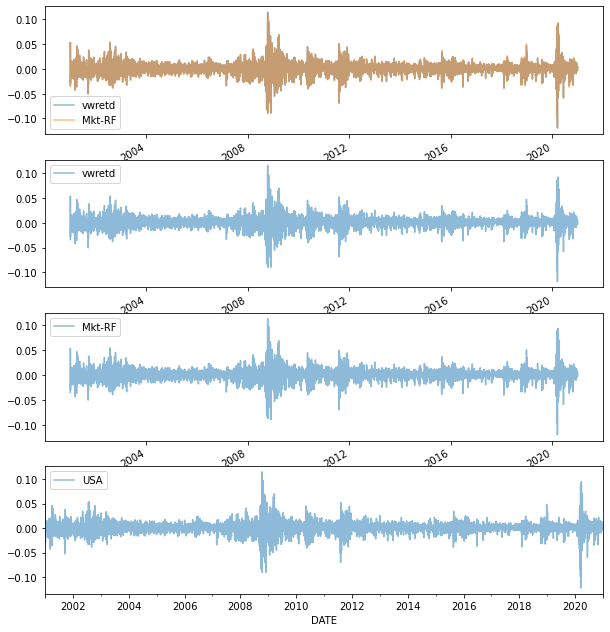

In [248]:
fig, ax =plt.subplots(nrows=4,ncols=1,figsize=(10,12))

(df_CRSP_market_daily.vwretd).plot(ax=ax[0],alpha=0.5)
df_FF_5['Mkt-RF'].plot(ax=ax[0],alpha=0.5)

(df_CRSP_market_daily.vwretd).plot(ax=ax[1],alpha=0.5)

df_FF_5['Mkt-RF'].plot(ax=ax[2],alpha=0.5)

df_AQR_MKT_daily['USA'].plot(ax=ax[3],alpha=0.5)

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

# Construct the Table 3

In [858]:
def get_alpha(df, factors,portfolio):
    x = df[factors].copy()
    x = sm.add_constant(x)
    results = sm.OLS(df_Port_FF5[portfolio], x).fit(cov_type='HC1')
    return results.params[0],results.params[1],results.tvalues[0]

In [859]:
df_betas=pd.read_pickle('../output/US/Portfolio Beta and Return Daily/beta.pickle')
df_returns=pd.read_pickle('../output/US/Portfolio Beta and Return Daily/return.pickle')
df_betas = df_betas.astype('float64')
df_returns = df_returns.astype('float64')

<AxesSubplot:>

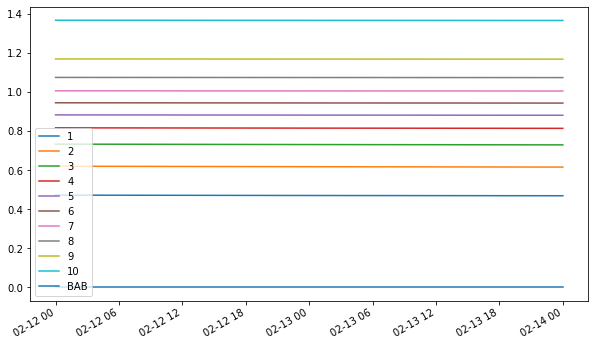

In [860]:
df_betas.rolling(30).mean().plot(figsize=(10,6))

<AxesSubplot:>

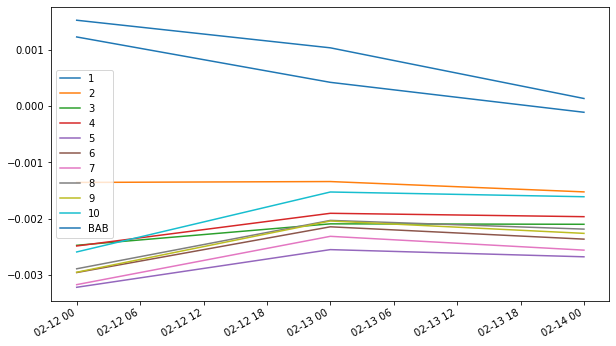

In [861]:
df_returns.rolling(30).mean().plot(figsize=(10,6))

In [666]:
df_table_3=pd.DataFrame(index=['Excess Return','CAPM alpha','Three-factor alpha','Four-factor alpha',
                   'Five-factor alpha','Beta(ex ante)','Beta(realized)','Volatility','Sharpe Ratio'],
            columns=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','BAB'])

In [667]:
df_table_4=pd.DataFrame(index=['CAPM alpha','Three-factor alpha','Four-factor alpha',
                   'Five-factor alpha'],
            columns=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','BAB'])

In [668]:
df_Port_FF5=df_returns.merge(df_FF_5,left_index=True,right_index=True)
df_Port_FF5 = df_Port_FF5.dropna()

In [669]:
#df_Port_FF5 = df_Port_FF5['2009-01-01':'2014-01-01']

In [670]:
df_Port_FF5.index

DatetimeIndex(['2007-12-31', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-07', '2008-01-08', '2008-01-09', '2008-01-10',
               '2008-01-11', '2008-01-14',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=3275, freq=None)

In [671]:


df_table_3.loc[df_table_3.index=='Excess Return',df_table_3.columns.difference(['BAB'],sort=False)]=\
((((1+df_Port_FF5).cumprod().iloc[-1,:10])**(252/len(df_Port_FF5))-1)*100).values/12

df_table_3.loc[df_table_3.index=='CAPM alpha',df_table_3.columns.difference(['BAB'],sort=False)]=\
[(get_alpha(df_Port_FF5,['Mkt-RF'],i)[0]*22)*100 for i in np.arange(1,11,1)]

df_table_3.loc[df_table_3.index=='Three-factor alpha',df_table_3.columns.difference(['BAB'],sort=False)]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML'],i)[0]*22)*100 for i in np.arange(1,11,1)]

df_table_3.loc[df_table_3.index=='Four-factor alpha',df_table_3.columns.difference(['BAB'],sort=False)]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW'],i)[0]*22)*100 for i in np.arange(1,11,1)]

df_table_3.loc[df_table_3.index=='Five-factor alpha',df_table_3.columns.difference(['BAB'],sort=False)]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW','CMA'],i)[0]*22)*100 for i in np.arange(1,11,1)]

df_table_3.loc[df_table_3.index=='Beta(ex ante)',df_table_3.columns.difference(['BAB'],sort=False)]=\
df_betas.mean().values

df_table_3.loc[df_table_3.index=='Beta(realized)',df_table_3.columns.difference(['BAB'],sort=False)]=\
[get_alpha(df_Port_FF5,['Mkt-RF'],i)[1] for i in np.arange(1,11,1)]

df_table_3.loc[df_table_3.index=='Volatility',df_table_3.columns.difference(['BAB'],sort=False)]=\
[df_Port_FF5[i].std()*np.sqrt(252)*100 for i in np.arange(1,11,1)]

df_table_3.loc[df_table_3.index=='Sharpe Ratio',df_table_3.columns.difference(['BAB'],sort=False)]=\
(df_table_3.loc['Excess Return']*12/df_table_3.loc['Volatility'])[:-1].values

In [672]:
df_table_3

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,BAB
Excess Return,0.282411,0.30603,0.421996,0.267511,0.3265,0.182152,0.186529,0.0564417,0.0363498,-0.0932098,NaN
CAPM alpha,0.105682,-0.0713313,-0.114263,-0.36662,-0.386586,-0.592132,-0.643338,-0.823777,-0.893837,-1.073,NaN
Three-factor alpha,0.131769,-0.0375254,-0.0871083,-0.339502,-0.335436,-0.518541,-0.540958,-0.680016,-0.707925,-0.766216,NaN
Four-factor alpha,0.136329,-0.0277122,-0.085287,-0.350392,-0.353345,-0.534179,-0.550116,-0.687571,-0.717267,-0.739223,NaN
Five-factor alpha,0.14027,-0.0275863,-0.0897186,-0.353873,-0.351045,-0.529596,-0.541571,-0.674689,-0.694146,-0.704993,NaN
Beta(ex ante),0.479224,0.609529,0.747287,0.849947,0.929278,1.00368,1.08156,1.16903,1.28322,1.54478,NaN
Beta(realized),0.217369,0.448578,0.646379,0.776509,0.896207,0.994221,1.10123,1.20403,1.33585,1.584,NaN
Volatility,8.61264,12.0197,15.2996,17.6449,20.0932,22.229,24.7256,27.2377,30.5077,37.377,NaN
Sharpe Ratio,0.393484,0.305529,0.330985,0.18193,0.194991,0.0983321,0.0905274,0.0248663,0.0142979,-0.0299253,NaN


In [673]:
df_table_4.loc[df_table_4.index=='CAPM alpha',df_table_4.columns.difference(['BAB'],sort=False)]=\
[get_alpha(df_Port_FF5,['Mkt-RF'],i)[2] for i in np.arange(1,11,1)]

df_table_4.loc[df_table_4.index=='Three-factor alpha',df_table_4.columns.difference(['BAB'],sort=False)]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML'],i)[2] for i in np.arange(1,11,1)]

df_table_4.loc[df_table_4.index=='Four-factor alpha',df_table_4.columns.difference(['BAB'],sort=False)]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW'],i)[2] for i in np.arange(1,11,1)]

df_table_4.loc[df_table_4.index=='Five-factor alpha',df_table_4.columns.difference(['BAB'],sort=False)]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW','CMA'],i)[2] for i in np.arange(1,11,1)]


In [674]:
df_table_4

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,BAB
CAPM alpha,0.571635,-0.379455,-0.661995,-2.31286,-2.40905,-3.4691,-3.27611,-3.63143,-3.2973,-2.73426,NaN
Three-factor alpha,0.726535,-0.209159,-0.547488,-2.50346,-2.90359,-4.96895,-5.05588,-6.0384,-5.00136,-3.17232,NaN
Four-factor alpha,0.736986,-0.151487,-0.526174,-2.54404,-3.01881,-5.08239,-5.05852,-6.0754,-5.02604,-3.03814,NaN
Five-factor alpha,0.758343,-0.151125,-0.554618,-2.56904,-3.00392,-5.04982,-5.00541,-6.03071,-4.97571,-2.9475,NaN


# Construct BAB Factor

In [772]:
beta_unit_dates_index=pd.read_pickle('../output/US/Ex_Ante_Beta_badtickerv1_Removed/AAPL.pickle').index

In [773]:
data_folder_path = '../output/US/Ex_Ante_Beta_badtickerv1_Removed/'
filenames=os.listdir(data_folder_path)
filenames.sort()

In [774]:
all_tickers=[filename[:-7] for filename in filenames]

In [775]:
stock_beta_by_ticker_dict={}
for filename in filenames:
    df_ = pd.read_pickle(data_folder_path+filename)
    stock_beta_by_ticker_dict[filename[:-7]]=df_

In [776]:
beta_unit_dates_index[0]

Timestamp('2007-12-31 00:00:00')

In [777]:
df_one_day_beta=pd.DataFrame(index=all_tickers,columns=['ex_ante_beta','ret'])

In [778]:
for filename in filenames:
    #print(filename)
    df_ = stock_beta_by_ticker_dict[filename[:-7]]
    if beta_unit_dates_index[1000] in df_.index:
        _=df_.loc[beta_unit_dates_index[1000]]
        df_one_day_beta.loc[df_one_day_beta.index==filename[:-7],'ex_ante_beta']=_.beta_est
        df_one_day_beta.loc[df_one_day_beta.index==filename[:-7],'ret']=_.ret

In [780]:
df_one_day_beta = df_one_day_beta.dropna()
df_one_day_beta['q']=df_one_day_beta.apply(lambda x: pd.qcut(x, 10, labels=range(1, 11))).ex_ante_beta
df_one_day_beta.q = df_one_day_beta.q.astype(np.int)
df_one_day_beta.ex_ante_beta = df_one_day_beta.ex_ante_beta.astype(np.float)
df_one_day_beta.ret = df_one_day_beta.ret.astype(np.float)

/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [781]:
df_one_day_beta = df_one_day_beta.sort_values(by='ex_ante_beta')

In [782]:
df_one_day_beta['rank'] = np.arange(1,len(df_one_day_beta)+1)

In [784]:
z_bar = np.sum(df_one_day_beta['rank'])/len(df_one_day_beta)

k = 2/np.sum(np.abs(df_one_day_beta['rank']-z_bar))

w_l = k*(df_one_day_beta.loc[df_one_day_beta['rank']<=z_bar,'rank']-z_bar)*-1
beta_l= np.sum(w_l.multiply(df_one_day_beta.loc[df_one_day_beta['rank']<=z_bar,'ex_ante_beta']))

w_h = k*(df_one_day_beta.loc[df_one_day_beta['rank']>z_bar,'rank']-z_bar)
beta_h= np.sum(w_h.multiply(df_one_day_beta.loc[df_one_day_beta['rank']>z_bar,'ex_ante_beta']))

BAB_ret=np.sum((df_one_day_beta.loc[df_one_day_beta['rank']<=z_bar,'ret']).multiply(w_l))/beta_l-\
np.sum((df_one_day_beta.loc[df_one_day_beta['rank']>z_bar,'ret']).multiply(w_h))/beta_h

In [786]:
df_one_day_beta  = df_one_day_beta.drop(columns='rank')

In [787]:
df_final = df_one_day_beta.groupby(['q']).mean().copy()

In [788]:
df_final.append(pd.DataFrame(index=['BAB'],data={'ex_ante_beta':0,'ret':BAB_ret}))

,ex_ante_beta,ret
1,0.472566,0.003505
2,0.592773,0.001273
3,0.709851,0.001395
4,0.792035,0.002673
5,0.866260,0.002344
6,0.934537,0.002315
7,1.008086,0.006852
8,1.082270,0.005071
9,1.176980,0.007076
10,1.362355,0.009106


In [816]:
def get_one_day_portfolio(date,stock_beta_by_ticker_dict,filenames):
    df_one_day_beta=pd.DataFrame(index=all_tickers,columns=['ex_ante_beta','ret'])
    for filename in filenames:
        #print(filename)
        df_ = stock_beta_by_ticker_dict[filename[:-7]]
        if date in df_.index:
            _=df_.loc[date]
            df_one_day_beta.loc[df_one_day_beta.index==filename[:-7],'ex_ante_beta']=_.beta_est
            df_one_day_beta.loc[df_one_day_beta.index==filename[:-7],'ret']=_.ret
    df_one_day_beta = df_one_day_beta.dropna()
    df_one_day_beta['q']=df_one_day_beta.apply(lambda x: pd.qcut(x, 10, labels=range(1, 11))).ex_ante_beta
    df_one_day_beta.q = df_one_day_beta.q.astype(np.int)
    df_one_day_beta.ex_ante_beta = df_one_day_beta.ex_ante_beta.astype(np.float)
    df_one_day_beta.ret = df_one_day_beta.ret.astype(np.float)
    
    df_one_day_beta = df_one_day_beta.sort_values(by='ex_ante_beta')
    df_one_day_beta['rank'] = np.arange(1,len(df_one_day_beta)+1)
    z_bar = np.sum(df_one_day_beta['rank'])/len(df_one_day_beta)

    k = 2/np.sum(np.abs(df_one_day_beta['rank']-z_bar))

    w_l = k*(df_one_day_beta.loc[df_one_day_beta['rank']<=z_bar,'rank']-z_bar)*-1
    beta_l= np.sum(w_l.multiply(df_one_day_beta.loc[df_one_day_beta['rank']<=z_bar,'ex_ante_beta']))

    w_h = k*(df_one_day_beta.loc[df_one_day_beta['rank']>z_bar,'rank']-z_bar)
    beta_h= np.sum(w_h.multiply(df_one_day_beta.loc[df_one_day_beta['rank']>z_bar,'ex_ante_beta']))

    BAB_ret=np.sum((df_one_day_beta.loc[df_one_day_beta['rank']<=z_bar,'ret']).multiply(w_l))/beta_l-\
    np.sum((df_one_day_beta.loc[df_one_day_beta['rank']>z_bar,'ret']).multiply(w_h))/beta_h
    df_one_day_beta  = df_one_day_beta.drop(columns='rank')
    df_final = df_one_day_beta.groupby(['q']).mean().copy()
    df_final = df_final.append(pd.DataFrame(index=['BAB'],data={'ex_ante_beta':0,'ret':BAB_ret}))
    return df_final

In [817]:
get_one_day_portfolio('2007-12-31',stock_beta_by_ticker_dict,filenames)

,ex_ante_beta,ret
1,0.518120,0.004648
2,0.675368,0.000663
3,0.777181,-0.001888
4,0.847976,-0.002969
5,0.905642,-0.003983
6,0.962663,-0.004647
7,1.018178,-0.005086
8,1.084608,-0.005581
9,1.180490,-0.005074
10,1.379301,-0.005445


In [793]:
beta_unit_dates_index[0]

Timestamp('2007-12-31 00:00:00')

In [802]:
df_P_beta=pd.DataFrame(index=beta_unit_dates_index,columns=np.concatenate((np.arange(1,11,1), ['BAB'])))
df_P_return=pd.DataFrame(index=beta_unit_dates_index,columns=np.concatenate((np.arange(1,11,1), ['BAB'])))

In [818]:
get_one_day_portfolio(beta_unit_dates_index[2],stock_beta_by_ticker_dict,filenames)

,ex_ante_beta,ret
1,0.494299,0.011205
2,0.650143,0.003909
3,0.758263,-0.005419
4,0.834522,-0.008945
5,0.895719,-0.007785
6,0.954687,-0.013094
7,1.012133,-0.013118
8,1.080556,-0.013410
9,1.177907,-0.014026
10,1.375259,-0.009906


In [815]:
for date in beta_unit_dates_index[40:]:
    print(date)
    df_=get_one_day_portfolio(date,stock_beta_by_ticker_dict,filenames)
    df_P_beta.loc[date]=df_.ex_ante_beta
    df_P_return.loc[date]=df_.ret
    df_P_beta.to_pickle('../output/US/Portfolio Beta and Return Daily/beta.pickle')
    df_P_return.to_pickle('../output/US/Portfolio Beta and Return Daily/return.pickle')

2008-02-28 00:00:00
2008-02-29 00:00:00
2008-03-03 00:00:00


KeyboardInterrupt: 